In [63]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

We will load the MNIST data again. This time, we will change the labels to be in a more standardized form. 

In [64]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)



Regularization techniques ensure that a deep neural network is generalized - avoids overfitting in particular. Some techniques we can employ:
- Penalization
- Dropout
- Batch Normalization
- Early Stopping

Let's first build a deep neural network to classify digits without any regularization

In [65]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) #keras.optimizers.SGD(0.01)

history_no_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9268 - loss: 0.2586 - val_accuracy: 0.9645 - val_loss: 0.1165
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0957 - val_accuracy: 0.9734 - val_loss: 0.0851
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.0622 - val_accuracy: 0.9745 - val_loss: 0.0819
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 0.9778 - val_loss: 0.0669
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9779 - val_loss: 0.0732
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9772 - val_loss: 0.0800
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9795 - val_loss: 0.0652
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accuracy: 0.

Let's introduce L2 weight regularization. This is theoretically a weight decay which will ensure that weights remain small and not one neuron influences inferences. 

In [66]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)),
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_l2_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.5930 - val_accuracy: 0.9611 - val_loss: 0.3513
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.2994 - val_accuracy: 0.9673 - val_loss: 0.2565
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.2296 - val_accuracy: 0.9668 - val_loss: 0.2156
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1985 - val_accuracy: 0.9735 - val_loss: 0.1864
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.1821 - val_accuracy: 0.9712 - val_loss: 0.1857
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.1712 - val_accuracy: 0.9750 - val_loss: 0.1694
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.1626 - val_accuracy: 0.9698 - val_loss: 0.1785
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.1532 - val_accuracy: 0.

Let's also introduce Dropout. Dropout with a probability p will randomly drop neurons from network during training. 

In [67]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_l2_drop_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9027 - loss: 0.6625 - val_accuracy: 0.9600 - val_loss: 0.3719
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9543 - loss: 0.3389 - val_accuracy: 0.9649 - val_loss: 0.2689
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.2658 - val_accuracy: 0.9691 - val_loss: 0.2254
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.2330 - val_accuracy: 0.9730 - val_loss: 0.2052
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.2181 - val_accuracy: 0.9679 - val_loss: 0.2099
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.2105 - val_accuracy: 0.9759 - val_loss: 0.1902
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.2062 - val_accuracy: 0.9707 - val_loss: 0.1992
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.2039 - val_accuracy: 0.

Now, we can compare the models to see if any generalization is observed. 

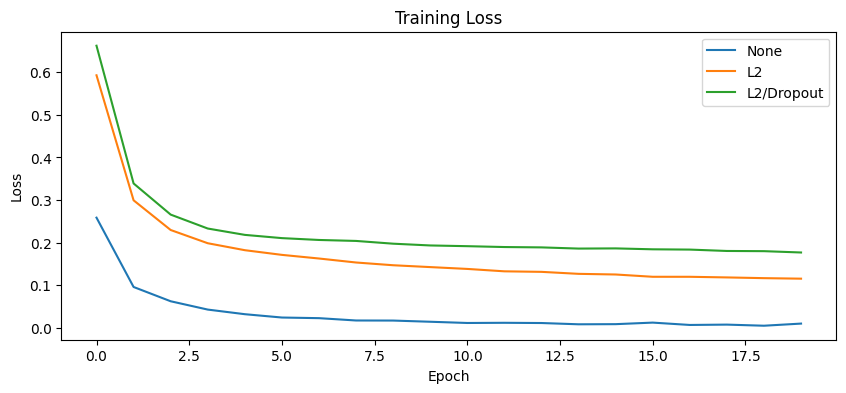

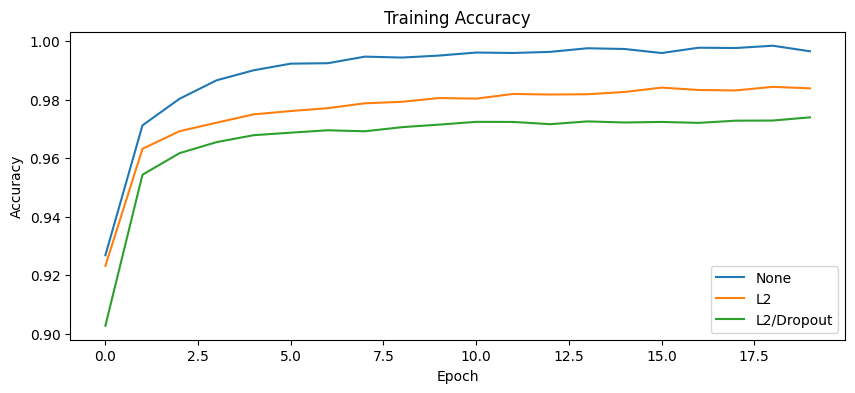

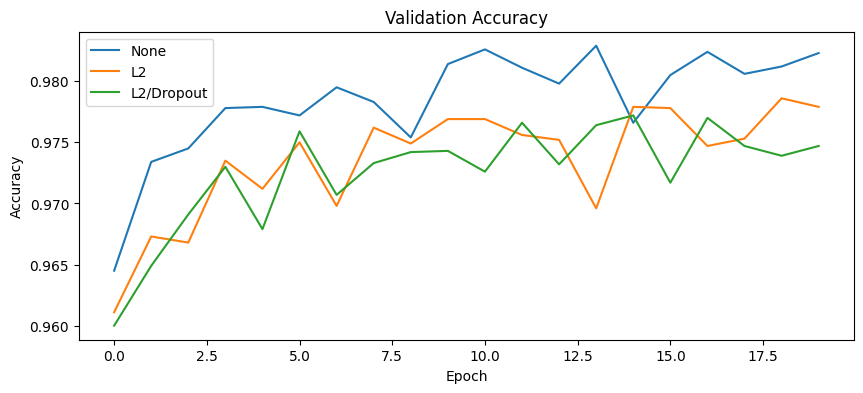

In [68]:

model_history = {"None":history_no_reg.history,
                 "L2":history_l2_reg.history,
                 "L2/Dropout":history_l2_drop_reg.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Training Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['accuracy'], label=f'{name}')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The plots show that training and validation accuracies are closer after model training. Note that with regularization, the model has not reached convergence and could use more training steps. 

Another option would be to use Early Stopping. This mechanism stops training when validation loss stops improving, preventing overfitting. We can use the EarlyStopping callback. 

In [69]:
model = keras.Sequential([
        keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 2,
    restore_best_weights = True
)

history_no_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist),
                           callbacks=[early_stopping])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2535 - val_accuracy: 0.9646 - val_loss: 0.1228
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0952 - val_accuracy: 0.9642 - val_loss: 0.1085
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0648 - val_accuracy: 0.9755 - val_loss: 0.0733
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9758 - val_loss: 0.0724
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9791 - val_loss: 0.0691
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0270 - val_accuracy: 0.9784 - val_loss: 0.0763
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9762 - val_loss: 0.0837


Our last regularization step (not include data augmentation), is Batch Normalization. This normalizes activations of each layer to mean = 0 and std = 1, per mini-batch. It stabilizes and speeds up training. Note that we can apply Batch Normalization before the activation function is applied. That is, normalize the weight sum and then apply an activation function on top. You can apply Batch Normalization after activation function as well, but be careful as ReLU can result in a lot of 0s.  

In [70]:
model = keras.Sequential([
        #keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,input_shape=(784,)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        #keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(256),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])


model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9409 - loss: 0.1989 - val_accuracy: 0.9703 - val_loss: 0.1004
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0746 - val_accuracy: 0.9704 - val_loss: 0.0929
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0493 - val_accuracy: 0.9771 - val_loss: 0.0731
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9797 - val_loss: 0.0664
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9774 - val_loss: 0.0726


In [71]:
# batch normalization adds additional parameters for the networks to learn
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,064 (3.10 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 540,694 (2.06 MB)

The network now has to learn two new parameters (scale and shift) per node, plus the running running mean and variance but these only need to be tracked not learned. 

Traditionally, the layout for a feed forward neural network should be
1. Define Input Layer
2. Add N Hidden Layers - for each, add L2 regularization, Activation Function, Batch Normalization (before/after activation)
3. Add Dropout between layers (after activation)
4. Define Output Layer with task-depended activation function (softmax for classification, sigmoid for binary, none for regression/linear)
5. Define Optimizer, Loss Function
6. Define Early Stopping parameters